In [1]:
#!pip install geopandas
#!pip install matplotlib
!pip install mapclassify


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#import the libraries needed for project
import geopandas
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('dark_background')
import mapclassify

In [3]:
#read the csv files into the project. Each one has name for the dataframe it features
gdf=geopandas.read_file('nyc_bb.geojson')
dogs = pd.read_csv('dogs_lic.csv')
income = pd.read_csv('borough_income.csv')

In [4]:
gdf

,boro_code,boro_name,shape_area,shape_leng,geometry
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ..."
1,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
2,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
3,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."
4,4,Queens,3041418003.6,888197.010944,"MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ..."


<Axes: >

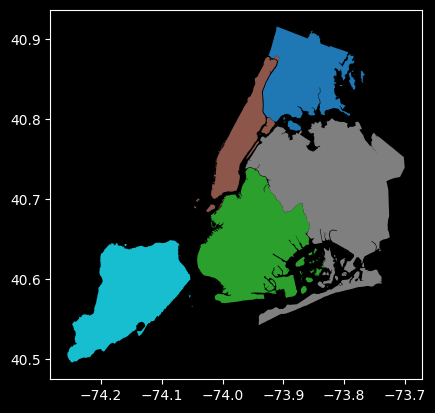

In [5]:
gdf.plot('boro_name')

In [6]:
dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).count().reset_index().rename(columns={'X':'Count'})

,boro_name,BreedName,Count
0,Bronx,Affenpinscher,2
1,Bronx,Afghan Hound,3
2,Bronx,Airedale Terrier,1
3,Bronx,Akita,18
4,Bronx,Akita Crossbreed,6
...,...,...,...
1216,Staten Island,Whippet,7
1217,Staten Island,Wire Fox Terrier,15
1218,Staten Island,Xoloitzcuintli,1
1219,Staten Island,Yorkshire Terrier,738


In [7]:
dogs_grouped = dogs[['boro_name', 'BreedName', 'X']].groupby(['boro_name', 'BreedName']).size().reset_index(name='count')

In [8]:
#filter out unknown in breedname
for x in dogs_grouped.index:
    if dogs_grouped.loc[x, 'BreedName'] == 'Unknown':
        dogs_grouped.drop(x, inplace=True)

In [9]:
top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

top_dog

C:\Users\sean8\AppData\Local\Temp\ipykernel_12296\738194143.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dog = dogs_grouped.groupby('boro_name').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


,boro_name,BreedName,count
0,Bronx,Yorkshire Terrier,1237
1,Bronx,Shih Tzu,1101
2,Bronx,Chihuahua,861
3,Brooklyn,Yorkshire Terrier,2002
4,Brooklyn,Shih Tzu,1893
5,Brooklyn,Chihuahua,1511
6,Manhattan,Yorkshire Terrier,2087
7,Manhattan,Chihuahua,1922
8,Manhattan,Shih Tzu,1843
9,Queens,Yorkshire Terrier,1704


In [10]:
boro_dog = gdf.merge(top_dog, on='boro_name', how='inner')

boro_dog

,boro_code,boro_name,shape_area,shape_leng,geometry,BreedName,count
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Yorkshire Terrier,2002
1,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Shih Tzu,1893
2,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Chihuahua,1511
3,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Yorkshire Terrier,738
4,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Shih Tzu,731
5,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Labrador Retriever,580
6,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Yorkshire Terrier,2087
7,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Chihuahua,1922
8,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Shih Tzu,1843
9,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",Yorkshire Terrier,1237


<Axes: >

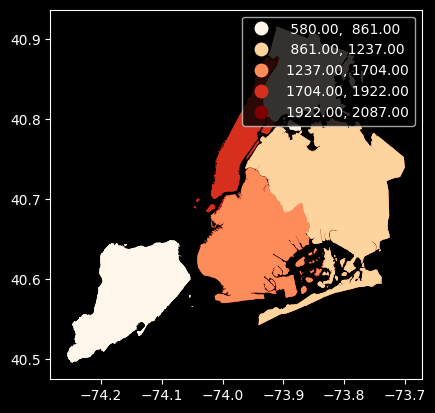

In [11]:
boro_dog.plot('count', legend=True, cmap='OrRd', scheme='natural_breaks')

In [12]:
boro_dog

,boro_code,boro_name,shape_area,shape_leng,geometry,BreedName,count
0,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Yorkshire Terrier,2002
1,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Shih Tzu,1893
2,3,Brooklyn,1934142775.63,728147.130565,"MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...",Chihuahua,1511
3,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Yorkshire Terrier,738
4,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Shih Tzu,731
5,5,Staten Island,1623618684.31,325910.306061,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",Labrador Retriever,580
6,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Yorkshire Terrier,2087
7,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Chihuahua,1922
8,1,Manhattan,636646082.483,360037.525777,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",Shih Tzu,1843
9,2,Bronx,1187174772.32,463180.578878,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",Yorkshire Terrier,1237
